In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
scaled_iris = StandardScaler().fit_transform(iris.data)

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(scaled_iris, iris.target)
lda_iris = lda.transform(scaled_iris)

lda_iris.shape

(150, 2)

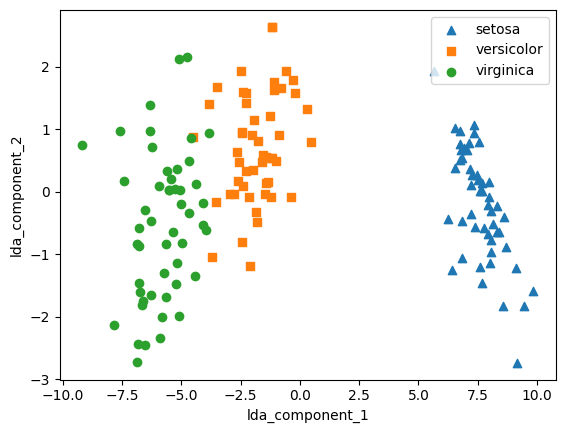

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns=['lda_component_1','lda_component_2']
lda_df = pd.DataFrame(lda_iris, columns=lda_columns)
lda_df['target'] = iris.target

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = lda_df[lda_df['target']==i]['lda_component_1']
    y_axis_data = lda_df[lda_df['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()